In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
import scipy.stats as sc
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import matthews_corrcoef

## Predicting the Genre of Books from Summaries

book summaries from the [CMU Book Summaries Corpus](http://www.cs.cmu.edu/~dbamman/booksummaries.html). Contains a large number of summaries (16,559) and includes meta-data about the genre of the books taken from Freebase.  Each book can have more than one genre and there are 227 genres listed in total.  To simplify the problem of genre prediction we will select a small number of target genres that occur frequently in the collection and select the books with these genre labels.  This will give us one genre label per book. 

## Data Preparation

In [2]:
names = ['wid', 'fid', 'title', 'author', 'date', 'genres', 'summary']

books = pd.read_csv("data/booksummaries/booksummaries.txt", sep="\t", header=None, names=names, keep_default_na=False)
books.head()

,wid,fid,title,author,date,genres,summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,,,The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...


In [4]:
target_genres = ["Children's literature",
                 'Science Fiction',
                 'Novel',
                 'Fantasy',
                 'Mystery']

# create a Series of empty strings the same length as the list of books
genre = pd.Series(np.repeat("", books.shape[0]))
# look for each target genre and set the corresponding entries in the genre series to the genre label
for g in target_genres:
    genre[books['genres'].str.contains(g)] = g

# add this to the book dataframe and then select only those rows that have a genre label
# drop some useless columns
books['genre'] = genre
genre_books = books[genre!=''].drop(['genres', 'fid', 'wid'], axis=1)

genre_books.shape


(8954, 5)

In [5]:
# check how many books we have in each genre category
genre_books.groupby('genre').count()


,title,author,date,summary
genre,,,,
Children's literature,1092,1092,1092,1092
Fantasy,2311,2311,2311,2311
Mystery,1396,1396,1396,1396
Novel,2258,2258,2258,2258
Science Fiction,1897,1897,1897,1897


## Feature Exaction


In [6]:
#Feature Extraction

#Generating vectorizer with max features

Vectorizer = TfidfVectorizer(max_features = 5000)

#Generating variables

X = Vectorizer.fit_transform(genre_books.summary).toarray()

y = genre_books.genre

Vectorizer.get_feature_names()

['000',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '19th',
 '20',
 '200',
 '20th',
 '21st',
 '24',
 '25',
 '30',
 '34',
 '39',
 '40',
 '50',
 '500',
 'aaron',
 'abandon',
 'abandoned',
 'abandons',
 'abbey',
 'abbot',
 'abducted',
 'abel',
 'abilities',
 'ability',
 'able',
 'aboard',
 'about',
 'above',
 'abruptly',
 'absence',
 'absent',
 'abuse',
 'abused',
 'abusive',
 'academic',
 'academy',
 'accept',
 'accepted',
 'accepting',
 'accepts',
 'access',
 'accident',
 'accidentally',
 'accompanied',
 'accompanies',
 'accompany',
 'according',
 'account',
 'accused',
 'accuses',
 'achieve',
 'achieved',
 'achilles',
 'acquaintance',
 'acquire',
 'acquired',
 'across',
 'act',
 'acting',
 'action',
 'actions',
 'activate',
 'active',
 'activities',
 'activity',
 'actor',
 'actress',
 'acts',
 'actual',
 'actually',
 'ad',
 'ada',
 'adam',
 'adams',
 'addition',
 'additional',
 'address',
 'adds',
 'admiral',
 'admit',
 'admits',
 'adopt',
 'adopted',

## Model Training

Then, train two predictive models from the given data set.

In [17]:
#Logistic Regression

#Train test split on data and declaring variables
#Test size is 0.25 and random state is 1000

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1000)
X_train.shape, y_train.shape

#Initialising logistic regression model

lr = LogisticRegression()

#Fitting logistic regression model

lr_fit = lr.fit(X_train, y_train)

#Making predictions with logistic regression

y_hat_test = lr.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
#Naive Bayes

#Train test split on data and declaring variables
#Test size is 0.25 and random state is 1000

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.25, random_state = 1000)

#Initialising naive bayes model

gnb = GaussianNB()

#Fitting naive bayes model

gnb_fit = gnb.fit(X_train2, y_train2)

#Making predictions with naive bayes

y_hat_test_bayes = gnb.predict(X_test2)

## Model Evaluation


In [52]:
#NOTE
#Accuracy is the percentage of predictions it got right.
#Confusion Matrix is the visualisation of the model's performance when running.
#Precision is the ratio of correct positive predictions observed to the total number of correct predictions observed.
#Recall is the ratio of correct positive predictions observed to all observations.
#F1 Score is the weighted average of precision and recall. Another measure of accuracy.

In [20]:
#Logistic Regression Model Evaluation

#Accuracy
accuracy_lr = accuracy_score(y_test, y_hat_test)
print("Accuracy =", accuracy_score(y_test, y_hat_test))

#Confusion Matrix
confusion_matrix_lr = confusion_matrix(y_test, y_hat_test)
print("Confusion Matrix=", confusion_matrix_lr)

#Precision
precision_lr = precision_score(y_test, y_hat_test, average = "weighted")
print("Precision = ", precision_lr)

#Recall
recall_lr = recall_score(y_test, y_hat_test, average = "weighted")
print("Recall = ", recall_lr)

#F1 Score
f1_lr = f1_score(y_test, y_hat_test, average = "weighted")
print("F1 Score =", f1_lr)

Accuracy = 0.6918267083519428
Confusion Matrix= [[121  51  18  65   7]
 [ 18 430  12  49  65]
 [ 18  19 213  71   9]
 [ 21  35  35 429  48]
 [  8  59  14  68 356]]
Precision =  0.6943513438012104
Recall =  0.6918267083519428
F1 Score = 0.689255807478298


In [21]:
#Naive Bayes Model Evaluation

#Accuracy
accuracy_nb = accuracy_score(y_test2, y_hat_test_bayes)
print("Accuracy =", accuracy_score(y_test2, y_hat_test_bayes))

#Confusion Matrix
confusion_matrix_nb = confusion_matrix(y_test2, y_hat_test_bayes)
print("Confusion Matrix =", confusion_matrix_nb)

#Precision
precision_nb = precision_score(y_test2, y_hat_test_bayes, average = "weighted")
print("Precision =", precision_nb)

#Recall
recall_nb = recall_score(y_test2, y_hat_test_bayes, average = "weighted")
print("Recall = ", recall_nb)

#F1 Score
f1_nb = f1_score(y_test2, y_hat_test_bayes, average = "weighted")
print("F1 Score =", f1_nb)




Accuracy = 0.5386333184457347
Confusion Matrix = [[107  39  37  58  21]
 [ 60 311  36  75  92]
 [ 30  19 186  64  31]
 [ 76  42  84 282  84]
 [ 16  54  23  92 320]]
Precision = 0.5466808187805785
Recall =  0.5386333184457347
F1 Score = 0.5403986140917043


## Comparing Models ##

In [22]:

#Creating Dataframe for Data
accuracylist = []
accuracylist.append(accuracy_lr)
accuracylist.append(accuracy_nb)
name = []
name.append("Logistic Regression")
name.append("Naive Bayes")
precision = []
precision.append(precision_lr)
precision.append(precision_nb)
recall = []
recall.append(recall_lr)
recall.append(recall_nb)
f1_score = []
f1_score.append(f1_lr)
f1_score.append(f1_nb)

#Dataframe
df = pd.DataFrame()
df["Name"] = name
df["Accuracy"] = accuracylist
df["Precision"] = precision
df["Recall"] = recall
df["F1 Score"] = f1_score

#Data Display
cm = sns.light_palette("Red", as_cmap = True)
s = df.style.background_gradient(cmap = cm)
s

,Name,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.691827,0.694351,0.691827,0.689256
1,Naive Bayes,0.538633,0.546681,0.538633,0.540399


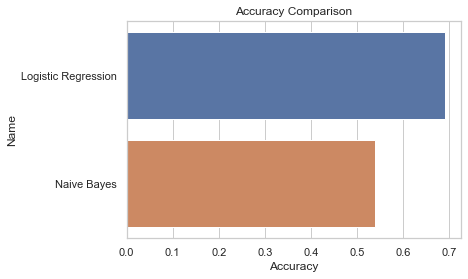

In [38]:
#Bar Plot for Models comparing accuracy
sns.set(style = "whitegrid")
plt.title("Accuracy Comparison")
ax = sns.barplot(y = "Name", x = "Accuracy", data = df)
#The plot showcases that logistic regression was able to obtain an accuracy closer to 0.7 whilst Naive Bayes could only reach 0.53 accuracy.
#This indicates that the logistic regression model was better at finding relationships and patterns between the two variables in comparison to Naive Bayes.

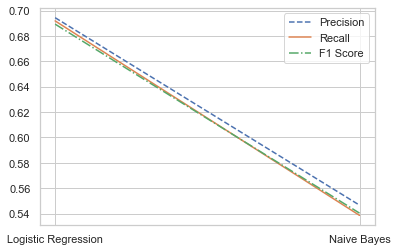

In [24]:
#Comparing Precision, Recall and F1 Score between both models
ax = plt.plot("Name", "Precision", linestyle = "--", data = df, label = "Precision")
ax = plt.plot("Name", "Recall", linestyle = "-", data = df, label = "Recall")
ax = plt.plot("Name", "F1 Score", linestyle = "-.", data = df, label = "F1 Score")
plt.legend(loc = "upper right")
plt.show()

#The following plot showcases the difference in precision, recall and f1 score between the two models, as the values drop when switching models from logistic regression to naive bayes.
#This indicates that logistic regression had a greater precision compared to naive bayes.
#In addition to this, the graph also shows that the recall of logistic regression is better compared to naive bayes.
#The F score of logistic regression is also shown to have a greater value than that of the naive bayes, which means that the logistic regression has a higher accuracy rate than naive bayes.

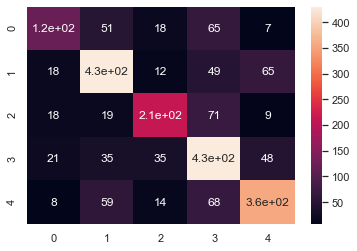

In [25]:
#Confusion Matrix for both Logistic Regression and Naive Bayes

#Confusion Matrix Heatmap for Logistic Regression
heatmap_lr = sns.heatmap(confusion_matrix_lr, annot = True)
#From the confusion matrix, it is evident that there are 1549 true positives. This indicates that the model was able to correctly classify books into genres 1549 times correctly.

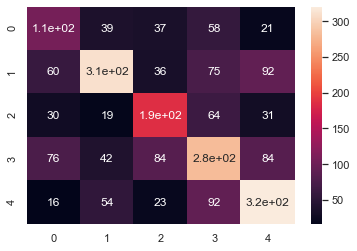

In [26]:
#Confusion Matrix for Naive Bayes
heatmap_nb = sns.heatmap(confusion_matrix_nb, annot = True)
#From the confusion matrix, it is evident that there are 1206 true positives. This indicates that the model was able to correctly classify books into genres 1206 times correctly.
#Compared to the logistic regression model, it didn't perform as well.

Matthew's Correlation Coefficient (Logistic Regression) = 0.6050088435710859
Matthew's Correlation Coefficient (Naive Bayes) = 0.41508864707677917


<AxesSubplot:>

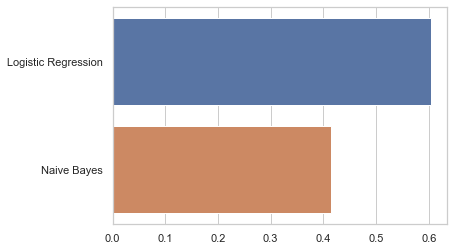

In [51]:
#Matthew's Coefficient to Comparison between Logistic Regression and Naive Bayes.

#Matthew's correlation coefficient uses true and false positives and negatives to measure the quality of classifications. The score given will be in the range -1 < x < 1 whereby x is the score given from the code.

#Matthew's correlation coefficient for Logistic Regression
matthew_correlation_coefficient_lr = matthews_corrcoef(y_test, y_hat_test)
print("Matthew's Correlation Coefficient (Logistic Regression) =", matthew_correlation_coefficient_lr)

#Matthew's correlation coefficient for Naive Bayes
matthew_correlation_coefficient_nb = matthews_corrcoef(y_test2, y_hat_test_bayes)
print("Matthew's Correlation Coefficient (Naive Bayes) =", matthew_correlation_coefficient_nb)

#From the results, it is evident that both logistic regression and naive bayes models obtain a positive correlation coefficient, however, the logistic regression model is closer to 1, thus making it more efficient and successful at making predictions than the naive bayes model.

#Plot
score = [matthew_correlation_coefficient_lr, matthew_correlation_coefficient_nb]
names = ["Logistic Regression", "Naive Bayes"]
sns.barplot(score, names)

## Conclusion ##

 - From the results of the project, it is evident that between the two predictive models that the logistic regression model was better at predicting the genre of books from summaries compared to the naive bayes model. This is seen through the evaluation metrics produced for both models, whereby the metrics used were accuracy, precision, recall, f1 score and matthew's correlation coefficient. From these metrics, logistic regression outperformed naive bayes  as evident from the outputs produced within the analysis. Visuals of this difference in performance can also be seen through the bar plots, line plot and heatmaps produced. It is possible that the two models could be tuned further to obtain better scores and provide a true indication of their performance, but from what is evident in this project, the logistic regression model was more efficient at predicting the genre of books from summaries.